# SMAC/CRISTAL/ULille

Auteur : Philippe Mathieu, CRISTAL Lab, SMAC Team, University of Lille, email : philippe.mathieu@univ-lille.fr

Date : 13 march 2020

## Simulation of epidemics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from covid import *

In [2]:
couleur_a='#396AB1'
couleur_b='#DA7C30'
dpi=300
figsize = (10,5)

# Un modèle S-I-(G/R)-M

Les infectés se répartissent en Graves et Remis (somme de ces deux taux sensiblement équivalent aux remis de l'ancien modèle). Les Graves finissent soit Remis (taux) soit Morts (1-taux).

In [3]:
data_nat = collecte_donnees()
data_reg = collecte_donnees('regional')
data_dep = collecte_donnees('departemental')

## Evaluation nationale

In [4]:
avant_confinement = data_nat.loc[:'2020-03-16'].shape[0]
renforcement = data_nat.loc[:'2020-03-24'].shape[0]
prolongement = data_nat.loc[:'2020-04-13'].shape[0]
deconfinement = data_nat.loc[:'2020-05-11'].shape[0]
aujourdhui = len(data_nat.index) - 1

In [55]:
I=np.array(data_nat['cas_confirmes']/67000000)
R=np.array(data_nat['gueris']/67000000)
G=np.array(data_nat['reanimation']/67000000)
M=np.array((data_nat['deces'])/67000000)
#M=np.array((data['deces'] + data['deces_ehpad'])/67000000)

S=[1]*len(data_nat.index) - I - G - R - M

data_objectif = np.array([S, I, G, R, M])

periodes_confinement = [avant_confinement, renforcement - avant_confinement, prolongement - renforcement, len(data_nat.index) - prolongement-1]

tauxInfecteInitial = 20 * data_nat['cas_confirmes'][0]/67000000 # Ici on peut modifier pour s'écarter du chiffre officiel initial

L'optimisation peut être lancée à l'aide de la commande suivante:

In [6]:
#solution = optimisation_genetique(500, 1000, data_objectif, periodes_confinement, eval_SIGRM, nb_parametres=2)

Comparaison graphique :

In [7]:
#compare_solution_SIGRM(solution, data_objectif, periodes_confinement)

## Solutions intéressantes

In [8]:
def scenario(listeTaux, category="G", label=None, linestyle='solid', color=couleur_b):
    tauxInfecteInitial = candidat[-5] 
    tauxGraves = candidat[-4]
    tauxRemis = candidat[-3]
    tauxRemisGraves = candidat[-2]
    tauxMortalite = candidat[-1]

    S=[1 - tauxInfecteInitial]
    I=[tauxInfecteInitial]
    G=[0.0]
    R=[0.0]
    M=[0.0]

    liste_taux = []
    i = 0
    for periode in periodes_confinement:
        liste_taux = liste_taux + [candidat[i]] * periode
        i += 1
    SIGRM_increment(S, I, G, R, M, liste_taux, tauxRemis, tauxGraves, tauxRemisGraves, tauxMortalite)
    SIGRM_increment(S, I, G, R, M, listeTaux, tauxRemis, tauxGraves, tauxRemisGraves, tauxMortalite)
    if category == "G":
        plt.plot(np.array(G)*67000000, label=label, color=color, linestyle=linestyle)
    if category == "M":
        plt.plot(np.array(M)*67000000, label=label, color=color, linestyle=linestyle)

### Proposition du 06/05

In [9]:
periodes_confinement = [avant_confinement, renforcement - avant_confinement, prolongement - renforcement, deconfinement - prolongement]
candidat=[0.275372335146436, 0.38676389057705435, 0.08906800372536995, 0.10045712354211243, 
          data_nat['cas_confirmes'][0]/67000000, 0.07, 0.07, 0.011445165643347396, 0.06942900452349375]
taux_intermediaire = (candidat[0] + candidat[3])/2

Evolution du R0 :

In [10]:
print(candidat[0] / (candidat[5] + candidat[6]))
print(candidat[1] / (candidat[5] + candidat[6]))
print(candidat[2] / (candidat[5] + candidat[6]))
print(candidat[3] / (candidat[5] + candidat[6]))

1.9669452510459713
2.762599218407531
0.6362000266097853
0.7175508824436602


In [11]:
tauxInfecteInitial = candidat[-5] 
tauxGraves = candidat[-4]
tauxRemis = candidat[-3]
tauxRemisGraves = candidat[-2]
tauxMortalite = candidat[-1]

S=[1 - tauxInfecteInitial]
I=[tauxInfecteInitial]
G=[0.0]
R=[0.0]
M=[0.0]

liste_taux = []
i = 0
for periode in periodes_confinement:
    liste_taux = liste_taux + [candidat[i]] * periode
    i += 1

In [12]:
SIGRM_increment(S, I, G, R, M, liste_taux, tauxRemis, tauxGraves, tauxRemisGraves, tauxMortalite)

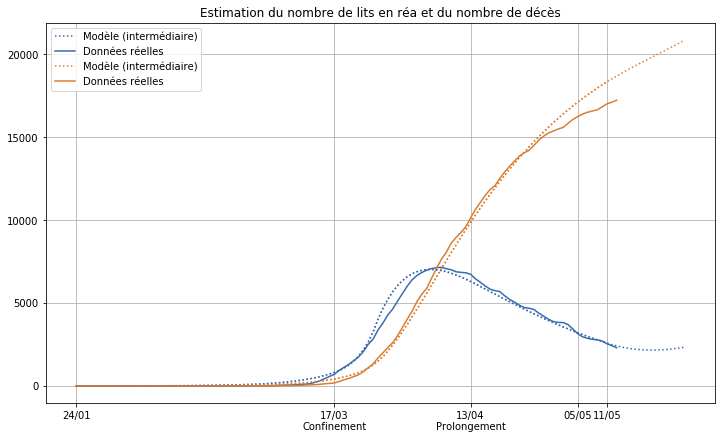

In [13]:
fig, ax = plt.subplots(figsize=(12,7))

plt.plot(np.array(G)*67000000, label="Modèle (intermédiaire)", color=couleur_a, linestyle=':')
plt.plot(data_objectif[2]*67000000, label="Données réelles", color=couleur_a)
plt.plot(np.array(M)*67000000, label="Modèle (intermédiaire)", color=couleur_b, linestyle=':')
plt.plot(data_objectif[4]*67000000, label="Données réelles", color=couleur_b)

# Après confinement
scenario([taux_intermediaire]*(aujourdhui - deconfinement+14), "G", 
         color=couleur_a, linestyle=':')
scenario([taux_intermediaire]*(aujourdhui - deconfinement+14), "M", color=couleur_b, linestyle=':')

plt.xticks([0, avant_confinement, prolongement, data_nat.loc[:'2020-05-05'].shape[0], deconfinement], 
           ('24/01', '17/03\nConfinement', '13/04\nProlongement', '05/05', '11/05'), rotation=0)

plt.title("Estimation du nombre de lits en réa et du nombre de décès")
plt.legend()
plt.grid()

In [14]:
(R[-1] + I[-1] + G[-1] + M[-1]) *100

0.07392257062500453

# Matrices d'âge

In [62]:
def SIGRM_age(S, I, G, R, M, matrice, population_vector, liste_tauxTransmiss, tauxRemis, tauxGraves, 
              tauxRemisGraves, tauxMortalite):

    for tauxTransmiss in liste_tauxTransmiss:

        nouveauxCas = tauxTransmiss*S[-1]*matrice.dot(I[-1]/population_vector)
        nouveauxInfectesRemis=tauxRemis*I[-1]
        nouveauxInfectesGraves=tauxGraves*I[-1]
        nouveauxGravesRemis=tauxRemisGraves*G[-1]
        nouveauxGravesMorts=tauxMortalite*G[-1]
        
        S = np.append(S, [S[-1]-nouveauxCas], axis=0) 
        I = np.append(I, [I[-1]+nouveauxCas-nouveauxInfectesRemis-nouveauxInfectesGraves], axis=0)
        G = np.append(G, [G[-1]+nouveauxInfectesGraves-nouveauxGravesMorts-nouveauxGravesRemis], axis=0)
        R = np.append(R, [R[-1]+nouveauxInfectesRemis+nouveauxGravesRemis], axis=0)
        M = np.append(M, [M[-1]+nouveauxGravesMorts], axis=0)
        #assert(round(S[-1]+I[-1]+G[-1]+R[-1]+M[-1],3) == 1) # la somme fait toujours 1
        
    return S, I, G, R, M

In [63]:
tauxInfecteInitial = np.array([0.001, 0.001])
tauxGraves = 0.05
tauxRemis = 0.1
tauxRemisGraves = 0.05
tauxMortalite = 0.05

matrice = np.array([[18, 9], [3, 12]])

repartition = np.array([0.25, 0.75])

population = 20000

population_vector = np.array([0.25, 0.75]) * 2000


S=[(1 - tauxInfecteInitial) * population_vector]
I=[tauxInfecteInitial * population_vector]
G=[tauxInfecteInitial*0]
R=[tauxInfecteInitial*0]
M=[tauxInfecteInitial*0]

liste_taux = [0.02]*200

In [64]:
S

[array([ 499.5, 1498.5])]

In [65]:
S, I, G, R, M = SIGRM_age(S, I, G, R, M, matrice, population_vector, liste_taux, tauxRemis, tauxGraves, tauxRemisGraves, tauxMortalite)

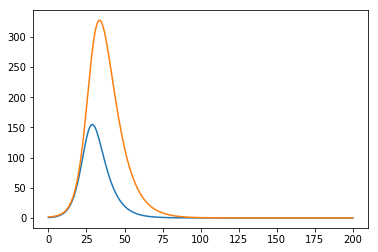

In [68]:
plt.plot(I)

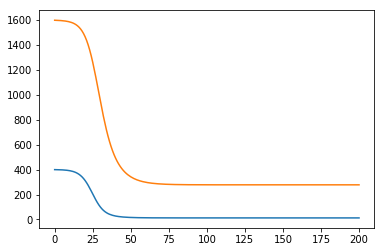

In [24]:
plt.plot(S)

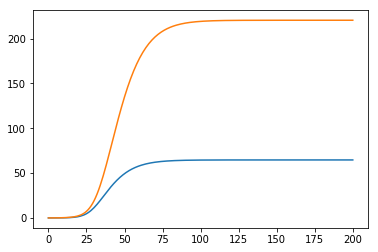

In [25]:
plt.plot(M)

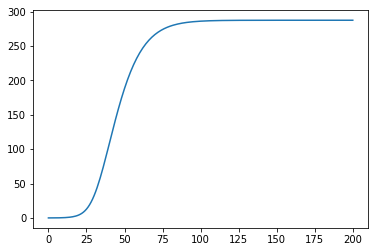

In [71]:
plt.plot(M[:,0] + M[:,1])

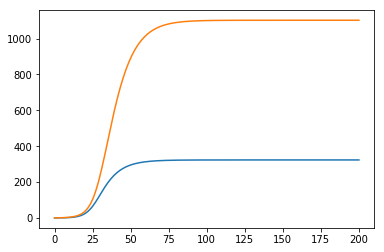

In [26]:
plt.plot(R)

## Optimisation

In [51]:
def eval_SIGRM_age(candidat, data_objectif, periodes_confinement, population=1, plot=False):
    candidat = np.absolute(candidat)
    tauxInfecteInitial = np.array([candidat[-5], candidat[-5]])
    tauxGraves = candidat[-4]
    tauxRemis = candidat[-3]
    tauxRemisGraves = candidat[-2]
    tauxMortalite = candidat[-1]
    
    # Paramètres fixes
    #tauxRemis = 0.08
    #tauxGraves = 0.07
    #tauxInfecteInitial = 400/67000000

    S=[(1 - tauxInfecteInitial) * population_vector]
    I=[tauxInfecteInitial * population_vector]
    G=[tauxInfecteInitial*0]
    R=[tauxInfecteInitial*0]
    M=[tauxInfecteInitial*0]

    liste_taux = []
    i = 0
    for periode in periodes_confinement:
        liste_taux = liste_taux + [candidat[i]] * periode
        i += 1

    S, I, G, R, M = SIGRM_age(S, I, G, R, M, matrice, population_vector, liste_taux, tauxRemis, tauxGraves, tauxRemisGraves, tauxMortalite)

    if plot:
        fig, ax = plt.subplots(figsize=(12,7))
        plt.plot(data_objectif[2]*67000000, label="Graves (données)")
        plt.plot(np.array(G[:,0] + G[:,1])*67000000, label="Graves (estimation")
        plt.plot(data_objectif[4]*67000000, label="Morts (données)")
        plt.plot(np.array(M[:,0] + M[:,1])*67000000, label="Morts (estimation)")
        plt.legend()
        plt.savefig(str(plot) +".jpg")

    return np.linalg.norm(np.array([G[:,0] + G[:,1],M[:,0] + M[:,1]] ) - np.array([data_objectif[2],data_objectif[4]]) ),

In [56]:
candidat = optimisation_genetique(1000, 500, data_objectif, periodes_confinement, eval_SIGRM_age, nb_parametres=len(periodes_confinement)+5, verbose=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in multiply
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in subtract
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in add


gen	nevals	avg	std	min	max
0  	1000  	nan	nan	nan	nan
1  	590   	nan	nan	nan	nan
2  	645   	nan	nan	nan	nan
3  	601   	nan	nan	nan	nan
4  	548   	nan	nan	nan	nan
5  	610   	nan	nan	nan	nan
6  	610   	nan	nan	nan	nan
7  	596   	nan	nan	nan	nan
8  	578   	nan	nan	nan	nan
9  	605   	nan	nan	nan	nan
10 	583   	nan	nan	nan	nan
11 	549   	nan	nan	nan	nan
12 	621   	nan	nan	nan	nan
13 	601   	nan	nan	nan	nan
14 	602   	nan	nan	nan	nan
15 	596   	nan	nan	nan	nan
16 	621   	nan	nan	nan	nan
17 	611   	nan	nan	nan	nan
18 	615   	nan	nan	nan	nan
19 	596   	nan	nan	nan	nan
20 	608   	nan	nan	nan	nan


KeyboardInterrupt: 

In [54]:
G

[array([0., 0.])]